<a href="https://colab.research.google.com/github/haribharadwaj/notebooks/blob/main/BME511/Orthogonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Orthogonality principle

Here, the problem is that we have a measurement $x(t)$ that can be thought of as a mixture of signal and noise, such that
$$ x(t) = s(t) + n(t) $$

We also have access to a surrograte "reference" measurement $n_{ref}(t)$ that is correlated with the (unknown) $n(t)$, and the goal is to construct an estimate $\hat{s}(t)$ of the signal by substracting a suitable estimate $\hat{n}(t)$ of the noise.

## Regression

A simple linear regression to construct the estimates is useful when the correlation between $n_{ref}(t)$ and $n(t)$ is instantaneous (i.e., only corresponding time samples are correlated), where
$$ \hat{n}(t) = \beta n_{ref}(t) $$
for some regression coefficient $\beta$.

Then using the intuition that **uncorrelated signals are orthogonal in signal space**, we can say
$$ \hat{s}(t) \perp n_{ref}(t) $$

From our vector notation, then we get
$$(\underline{x} - \beta \underline{n}_{ref})^T \underline{n}_{ref} = 0 $$
Thus
$$ \beta  = \langle \underline{x}, \frac{\underline{n}_{ref}}{\underline{n}_{ref}^T \underline{n}_{ref}} \rangle $$

## Active filtering

When the correlations extend over delays too and are not just instantaneous, then we can estimate a filter $h(t)$ rather than a simple regression coefficient relating $n_{ref}(t)$ and $n(t)$.

If we assume that $h(t)$ has $p$ non-zero samples, to estimate each of the $p$ entries of $\underline{h}$, we can apply orthogonality between $\hat{s}(t)$ and not only $n_{ref}(t)$, but also time-shifted versions of $n_{ref}(t)$, with a shift of up to $(p - 1)$ samples.

If a matrix $A$ is constructed such that each column is a time-shifted copy of $n_{ref}(t)$, where the time shift varies from $0$ to $(p - 1)$ samples, then using orthogonality, we get
$$ \underline{h} = (A^T A)^{-1} A^T \underline{x} $$

Note that $p$ is a "hyperparameter" that will need to be chosen by hand (the entries of $\underline{h}$ are the "parameters").

In [1]:
import numpy as np
import pylab as pl
from scipy import io
from google.colab import drive

drive.mount('/content/gdrive/')
datadir = '/content/gdrive/My Drive/BME511Data/'
dat = io.loadmat(datadir + 'fetalEKG.mat', squeeze_me=True)

Mounted at /content/gdrive/


Text(0.5, 0, 'Time (s)')

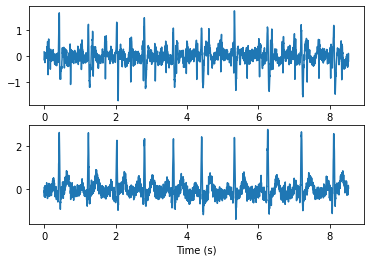

In [2]:
nref = dat['nref']
x = dat['x']
fs = dat['fs']
t = np.arange(x.shape[0]) / fs
ax1 = pl.subplot(211)
ax1.plot(t, x)
ax2 = pl.subplot(212, sharex=ax1)
ax2.plot(t, nref)
pl.xlabel('Time (s)')

In [3]:
from scipy import linalg
p = 128
A = linalg.toeplitz(nref[(p-1):],nref[:p][::-1])
xsub = x[(p-1):]
h = np.dot(linalg.pinv(A), xsub)

# Alternate method for pseudoinverse + multiplication
# This way is more computationally intensive but less memory intensive
h2 = linalg.lstsq(A, xsub)[0]

In [4]:
from scipy import signal
nhat = signal.lfilter(h, 1, nref)
shat = x - nhat

Text(0.5, 0, 'Time (s)')

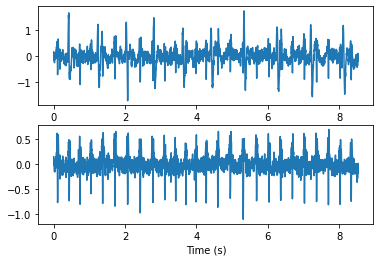

In [5]:
ax1 = pl.subplot(211)
ax1.plot(t, x)
ax2 = pl.subplot(212, sharex=ax1)
ax2.plot(t, shat)
pl.xlabel('Time (s)')

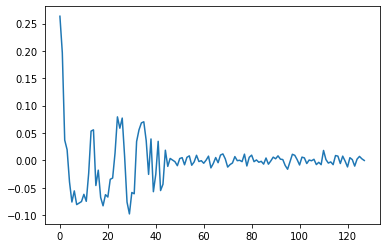

In [6]:
pl.plot(h)